# SIMULAÇAO DE GRAFOS

* Fernando Tancini - 1711799
* Andrea Mourelo - 1820000

## Considerações iniciais

A ideia deste trabalho é apresentar alguns conceitos de simulação de grafos e aplicá-los num exemplo prático de contágio de doença numa população. 
Para isso, vamos apresentar na seguinte ordem:
* O pacote NetworkX para simulação de redes complexas
* A criação de um grafo de simulação de população
* A simulação de contaminação de doença numa população
* A simulação de contaminação de doença numa população com 4 clusters (significando por exemplo cidades)
* Uma aplicaçao possivel : medir quantas alertas uma populaçao vai ter em funçao da gravidade da doença

## Presentação de NetworkX

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from networkx import *
import matplotlib.pyplot as plt
import random
%matplotlib inline
import math
print('NetworkX version: {}'.format(nx.__version__))

NetworkX version: 2.2


### Nós e arestas

#### Criaçao de nós

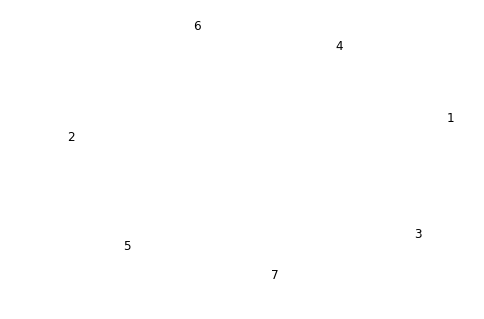

In [2]:
# Criacao de um grafo nao direcionado
G = nx.Graph()
# Adicionando um nó por vez
G.add_node('1')
G.add_node('2')
# Lista de nós
G.add_nodes_from(['3', '4', '5', '6', '7'])
nx.draw(G, node_size=800, node_color='white', with_labels=True)

#### Criaçao de arestas

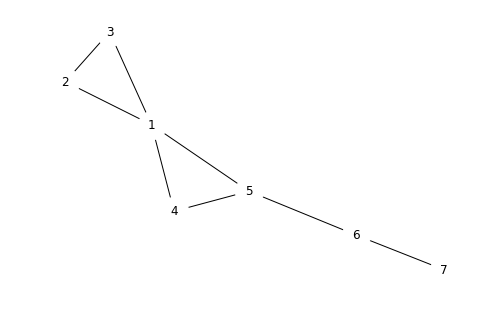

In [3]:
# Adicionando uma aresta
G.add_edge('1', '2')
# Com um tuple (tem que unpack)
t = ('2', '3')
G.add_edge(*t)
# Com uma lista
G.add_edges_from([('1', '3'), ('1','4'), ('1','5'), ('5','4'), ('5','6'), ('6','7')])
nx.draw(G, node_size=800, node_color='white', with_labels=True)

#### Removendo nos ou arestas

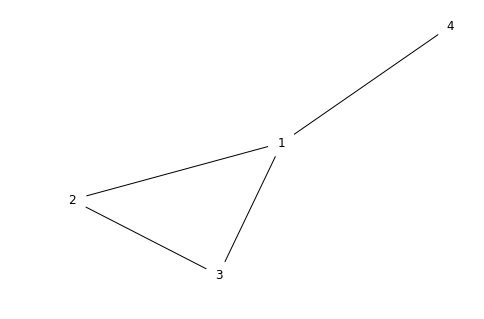

In [4]:
# Removendo um no
G.remove_node('7')
G.remove_nodes_from(['5','6'])
nx.draw(G, node_size=800, node_color='white', with_labels=True)

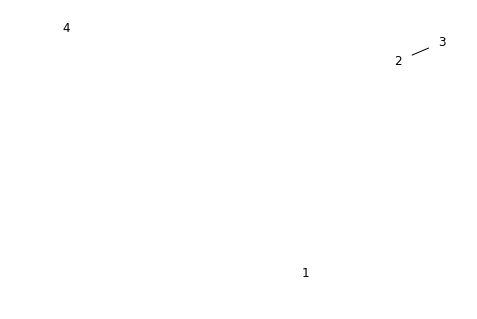

In [5]:
# Removendo um no
G.remove_edge('1','2')
G.remove_edges_from([('1','3'),('4','1')])
nx.draw(G, node_size=800, node_color='white', with_labels=True)

### Atributos

#### Atributos de um grafo

In [6]:
# Atribuindo atributos ao criar o grafo
G = nx.Graph(Name='Teste', Owner='Marcelo')
G.graph # Acessa o dicionário dos atributos

{'Name': 'Teste', 'Owner': 'Marcelo'}

In [7]:
# Modificações
G.graph['Owner']='Mariana'
G.graph

{'Name': 'Teste', 'Owner': 'Mariana'}

#### Atributos de um nó

In [8]:
# 3 tipos de atribuição
G.add_node('1', Owner='Joao')
G.add_nodes_from(['3','4'], Hora='2pm') # varios nós
G.node['1']['Cidade'] = 'Roma'

In [9]:
# Acesando o valor de um atributo
G.node['1']['Cidade']

'Roma'

In [10]:
# Acesando o dicionário de atributos de um nó
G.node['1']

{'Owner': 'Joao', 'Cidade': 'Roma'}

In [11]:
# Nós, sem atributos
print(list(G.nodes()))
# Nós com atributos
print(list(G.nodes(data=True)))
# Atributos especificos
print(list(G.nodes(data='Cidade')))

['1', '3', '4']
[('1', {'Owner': 'Joao', 'Cidade': 'Roma'}), ('3', {'Hora': '2pm'}), ('4', {'Hora': '2pm'})]
[('1', 'Roma'), ('3', None), ('4', None)]


In [12]:
# Definindo varios atributos com um dicionário
nx.set_node_attributes(G, name='Cidade', values={'3': 'Barcelona', '4':'Paris'})
nx.set_node_attributes(G, name='Ano', values=2019)

In [13]:
nx.get_node_attributes(G, 'Cidade')

{'1': 'Roma', '3': 'Barcelona', '4': 'Paris'}

In [14]:
nx.get_node_attributes(G, 'Ano')

{'1': 2019, '3': 2019, '4': 2019}

#### Atributos de uma aresta

In [15]:
# Varias maneiras
G.add_edge('1', '2', distancia=4.0)
G.add_edges_from([('3', '4'),('4', '1')], color='red')
G.add_edges_from([('1', '2', {'color':'blue'}), ('2', '3', {'distancia':8})])
G['1']['2']['distancia']

4.0

In [16]:
G['1']['2']['distancia'] = 10.0
G['1']['2']['distancia']

10.0

In [17]:
G['1']['2']

{'distancia': 10.0, 'color': 'blue'}

In [18]:
# Arestas
print(list(G.edges()))
# Arestas com atributos
print(list(G.edges(data=True)))
# Atributos especificos
print(list(G.edges(data='color')))

[('1', '2'), ('1', '4'), ('3', '4'), ('3', '2')]
[('1', '2', {'distancia': 10.0, 'color': 'blue'}), ('1', '4', {'color': 'red'}), ('3', '4', {'color': 'red'}), ('3', '2', {'distancia': 8})]
[('1', '2', 'blue'), ('1', '4', 'red'), ('3', '4', 'red'), ('3', '2', None)]


In [19]:
# Com um dicionário
nx.set_edge_attributes(G, name='Familia', values={('1', '2'): True, ('2', '3'): False, ('3', '4'): False})

In [20]:
# Para todas as arestas
nx.set_edge_attributes(G, name='Amizade', values=1)

In [21]:
# Print
nx.get_edge_attributes(G, 'Amizade')

{('1', '2'): 1, ('1', '4'): 1, ('3', '4'): 1, ('3', '2'): 1}

In [22]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 4
Average degree:   2.0000


## Outros conceitos

#### Grafos dirigidos

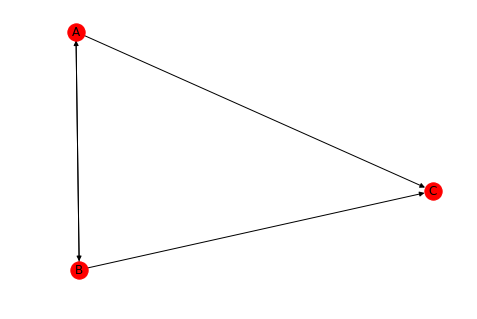

In [23]:
G = nx.DiGraph()
G.add_edges_from([('A', 'B'),('B', 'A'),('B','C'),('A','C')])
nx.draw(G,with_labels = True)

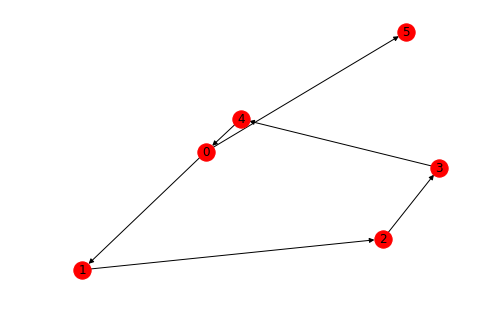

In [24]:
D = nx.cycle_graph(5, create_using=nx.DiGraph())
D.add_edge(0, 5)
nx.draw(D,with_labels = True)

In [25]:
# Sucessores de um nó
list(D.successors(0))

[1, 5]

In [26]:
# Antecedentes
list(D.predecessors(0))

[4]

#### Arestas com pesos

In [27]:
for i, (u, v) in enumerate(D.edges(), 1):
    D[u][v]['weight'] = i

{(0, 1): Text(-0.2606182201330823, -0.08107050241099659, '1'),
 (0, 5): Text(0.6372405755867141, -0.12967213622937515, '2'),
 (1, 2): Text(-0.6295185936649015, 0.00447935165844132, '3'),
 (2, 3): Text(-0.29292623008043817, 0.10955837900688307, '4'),
 (3, 4): Text(-0.0077219819218129065, 0.12519278457093383, '5'),
 (4, 0): Text(0.1907850258002344, -0.04491990569959413, '6')}

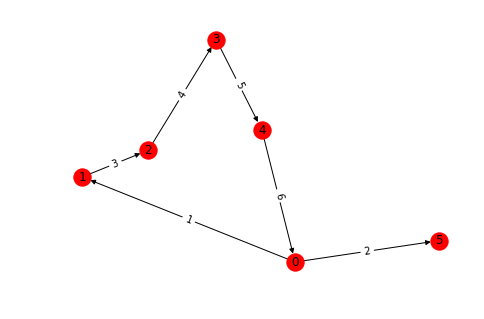

In [28]:
pos = nx.fruchterman_reingold_layout(D)
nx.draw(D, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(D, pos, edge_labels=nx.get_edge_attributes(D, 'weight'))

## Criação de um grafo de simulação de população

In [29]:
# support functions
def rNormal(nsamples,mu,sigma2):
    x = np.zeros(nsamples)
    for i in range(nsamples):
        while(1):
            u1 = np.random.sample(1)
            y  = -math.log(u1)
            py = math.sqrt(2.0/math.pi)*math.exp(-0.5*y**2)
            hy = math.exp(-y)
            c  = math.sqrt(2.0*math.exp(1.0)/math.pi)
            u2 = np.random.sample(1)
            if (u2 <= py/(c*hy)):
                u3 = np.random.sample(1)
                if (u3 < 0.5):
                    x[i] = mu-math.sqrt(sigma2)*y
                else:
                    x[i] = mu+math.sqrt(sigma2)*y
                break
    return x

def rExponencial(nsamples,rate):
    x = np.zeros(nsamples)
    u = np.random.sample(nsamples)
    for i in range(nsamples):
        x[i] = - math.log(1.0-u[i])/rate
    return (x)

In [30]:
def generateNodePosX():
    return rNormal(1, 0, 100)[0]

def generateNodePosY():
    return rNormal(1, 0, 100)[0]

def generateMaxDistForBond():
    return rExponencial(1,0.5)[0]

def generatePopulationGraph(nNodes, attributes = {},
                            generateNodePosX = generateNodePosX,
                            generateNodePosY = generateNodePosY,
                            generateMaxDistForBond = generateMaxDistForBond):
    G = nx.Graph()

    # create the nodes
    # change the distribution probability here (@Fernando, @Andrea)
    for i in range(nNodes):
        pos  = (generateNodePosX(), generateNodePosY())
        G.add_node(i, pos = pos)
        
    # set the nodes attributes
    for key, value in attributes.items():
        for (p1_index, _) in G.nodes(data=True):
            G.nodes[p1_index][key] = value

    # create the bonds to all the nodes in a certain range of distance
    # change the rolus for bond creating, for exemple: distribution probability = f(x) = 1/x
    for (p1_index, p1_data) in G.nodes(data=True):
        for (p2_index, p2_data) in G.nodes(data=True):
            if (p1_index != p2_index):
                Dist = np.sqrt((p1_data['pos'][1]-p2_data['pos'][1])**2+(p1_data['pos'][0]-p2_data['pos'][0])**2)
                if Dist <= generateMaxDistForBond():
                    G.add_edge(p1_index,p2_index)

    # remove node isolados
    G.remove_nodes_from(list(nx.isolates(G)))
    
    # pegando so um unico grafo todo conectado (o maior)
    G = max(nx.connected_component_subgraphs(G), key=len)

    # positioning the nodes according to their virtual position
    pos = {}
    for (n_index, n_data) in G.nodes(data=True):
        pos[n_index] = n_data['pos']

    return (G, pos)

85


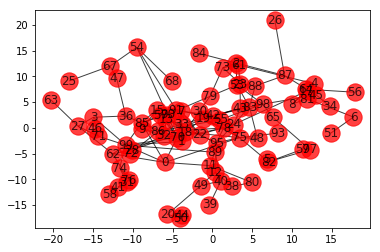

In [31]:
nNodes = 100
(exemple_graph, pos) = generatePopulationGraph(nNodes)
print(len(exemple_graph))
nx.draw_networkx(exemple_graph,node_color='red',pos=pos, alpha=0.75)

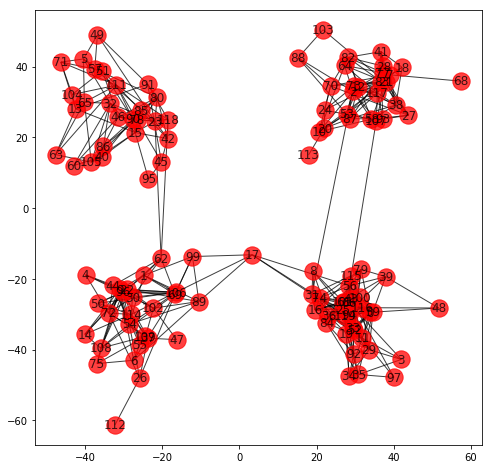

In [32]:
def myGenerateNodePosX():
    u = np.random.sample(1)
    if (u < 0.5):
        return rNormal(1, -28, 100)[0]
    else:
        return rNormal(1, 28, 100)[0]

def myGenerateNodePosY():
    u = np.random.sample(1)
    if (u < 0.5):
        return rNormal(1, -28, 100)[0]
    else:
        return rNormal(1, 28, 100)[0]
    
def myGenerateMaxDistForBond():
     return rExponencial(1,0.15)[0]
    
#func pra usar essas novas clusterizações
def generateClusteredPopulationGraph(nNodes, attributes = {},):
    return generatePopulationGraph(nNodes, attributes,
                            generateNodePosX = myGenerateNodePosX,
                            generateNodePosY = myGenerateNodePosY,
                            generateMaxDistForBond = myGenerateMaxDistForBond)

nNodes = 120
(exemple_graph, pos) = generateClusteredPopulationGraph(nNodes)
plt.figure(figsize=(8, 8))
nx.draw_networkx(exemple_graph,node_color='red',pos=pos, alpha=0.75)

## Simulando contaminação

In [33]:
# Função usada para o set up da seed a cada função, pois se não não funcionava
seed_value = 1001004
    
def setNodeSick(G,node):
    # Makes the node "node" become sick
    G.node[node]['sick'] = 1 # becomes sick
    
def setNodeHealthy(G,node):
    # Makes the node "node" become healthy
    G.node[node]['sick'] = 0 # becomes healthy
    G.node[node]['timeOfSickness'] = 0 # sickness time goes to 0 again

def setNodeRecovered(G,node):
    # Makes the node "node" become recovered
    G.node[node]['sick'] = 2 # becomes recovered
    G.node[node]['timeOfSickness'] = 0 # sickness time goes to 0 again
    
def getDiseaseGroups(G):
    # Returns 3 lists, one with the sick nodes, another with the healthy ones and finally one with the recovered ones
    sick, notSick, recovered = [],[],[]
    sickness = nx.get_node_attributes(G, 'sick')
    for key,value in sickness.items():
        if (value == 0):
            notSick.append(key)
        elif (value == 1) :
            sick.append(key)
        else :
            recovered.append(key)
    return sick, notSick, recovered

def propagateDisease(G,probaContagion):
    # With a probability probaContagion, propagates the disease (or not) to the neigbors of the sick people
    sick, notSick, recovered = getDiseaseGroups(G)
    for node in sick:
        for neigbor in G.neighbors(node):
            if G.node[neigbor]['sick'] != 2 : # if the person is recovered, can't be sick again
                u = np.random.sample(1)[0]
                if (u < probaContagion):
                    setNodeSick(G,neigbor)
                
def propagateRecovery(G,timeOfSickness):
    sick, notSick, recovered  = getDiseaseGroups(G)
    for node in sick:
        if (G.node[node]['timeOfSickness'] == timeOfSickness):
            #setNodeHealthy(G,node)
            setNodeRecovered(G,node)

def updateSicknessStatus(G):
    sick, notSick, recovered = getDiseaseGroups(G)
    for node in sick: 
        G.node[node]['timeOfSickness'] += 1 # 1 day more of sickness

def checkAlert(G, nPeople, ratio):
    sick, notSick, recovered  = getDiseaseGroups(G)
    nSick = len(sick)
    sickRatio = nSick/nPeople
    check = (sickRatio >= ratio)
    return check, nSick, sickRatio
        
def plotGraph(G,ax,pos,time = None):
    # Plots the evolution of the disease distribution
    sick,notSick, recovered = getDiseaseGroups(G)
    if (time != None):
        title = "t = " + str(time)
        ax.set_title(title,fontsize=15)
    nx.draw_networkx_nodes(G, pos=pos, nodelist=sick, node_size=50, node_color='red', ax=ax)
    nx.draw_networkx_nodes(G, pos=pos, nodelist=notSick, node_size=50, node_color='green', ax=ax)
    nx.draw_networkx_nodes(G, pos=pos, nodelist=recovered, node_size=50, node_color='blue', ax=ax)
    #nx.draw_networkx_labels(G, pos=pos, labels={n: n for n in G.nodes()}, font_size=8, ax=ax)
    nx.draw_networkx_edges(G, pos=pos, ax=ax)
    #ax.set_axis_off() # Remove axes
    
def DiseaseExperience(people, experienceTime, timeOfSickness, probaContagion, firstSicksN, alertRatio, plot, nPlotsPerLine = 3, graphGenerator = generatePopulationGraph):
    
    # Setting the graph
    (G, pos) =  graphGenerator(  nNodes = people,
                                attributes = {'sick': False, 'timeOfSickness' : 0})

    # Setting the firsts sick people
    firstSicks = random.sample(G.nodes, firstSicksN)
    for sickPerson in firstSicks:
        setNodeSick(G,sickPerson)
    
    # Plot settings
    if (plot==1):
        nLines = int(experienceTime/nPlotsPerLine)
        fig, axes = plt.subplots(nLines, nPlotsPerLine, sharex=True, sharey=True, figsize = (15, 15))
        plt.suptitle('DISEASE EVOLUTION', fontsize=20)
    line_plot = 0
    
    # Evolution
    alertTimes = []
    for second in range(time):
        if (plot == 1):
            plotGraph(G,axes[line_plot, second%3],pos, second)
        alert, nSick, sickRation = checkAlert(G,people,alertRatio)
        if (alert == True):
            alertTimes.append([second,nSick, sickRation])
            if (plot == 1):
                print("At time " + str(second) + " there were " + str(nSick) + " sick people, which is a rate of "+ str(sickRation))
        propagateDisease(G,probaContagion)
        propagateRecovery(G,timeOfSickness)
        updateSicknessStatus(G)
        if (second%3 == 2):
            line_plot += 1
        if (second == 0):
            G_initial = G
    if (plot==1):
        fig.tight_layout()
        fig.subplots_adjust(top=0.9) 
    return G, pos, alertTimes

At time 4 there were 55 sick people, which is a rate of 0.55
At time 5 there were 62 sick people, which is a rate of 0.62
At time 6 there were 59 sick people, which is a rate of 0.59


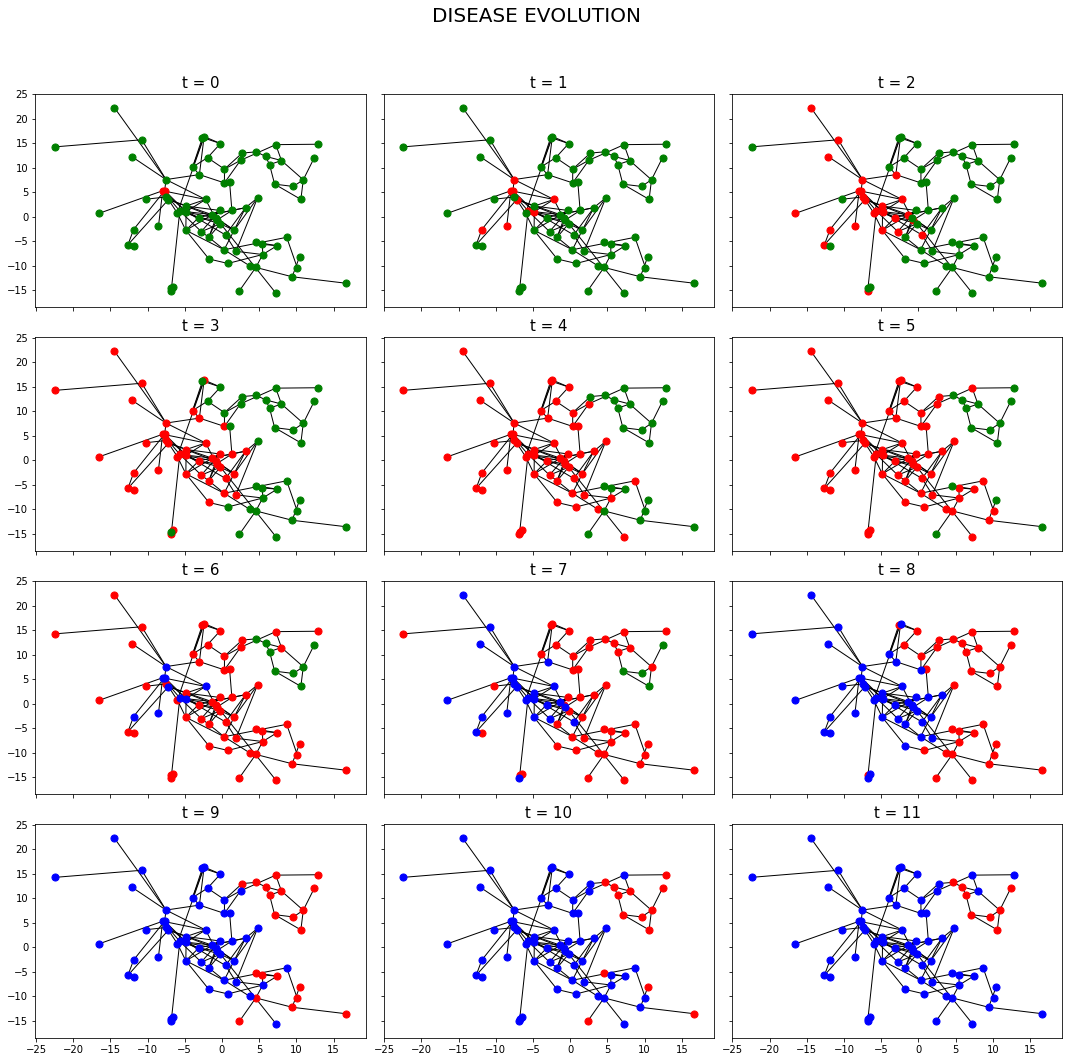

In [34]:
people = 100
time = 12
timeOfSickness = 5
probaContagion = 0.9
firstSicksN = 2
nPlotsPerLine = 3
alertRatio = 0.5
plot = 1
G, pos, alertTimes = DiseaseExperience(people, time, timeOfSickness, probaContagion, firstSicksN, alertRatio, plot, nPlotsPerLine)


At time 3 there were 97 sick people, which is a rate of 0.6466666666666666
At time 4 there were 120 sick people, which is a rate of 0.8
At time 5 there were 140 sick people, which is a rate of 0.9333333333333333
At time 6 there were 126 sick people, which is a rate of 0.84
At time 7 there were 78 sick people, which is a rate of 0.52


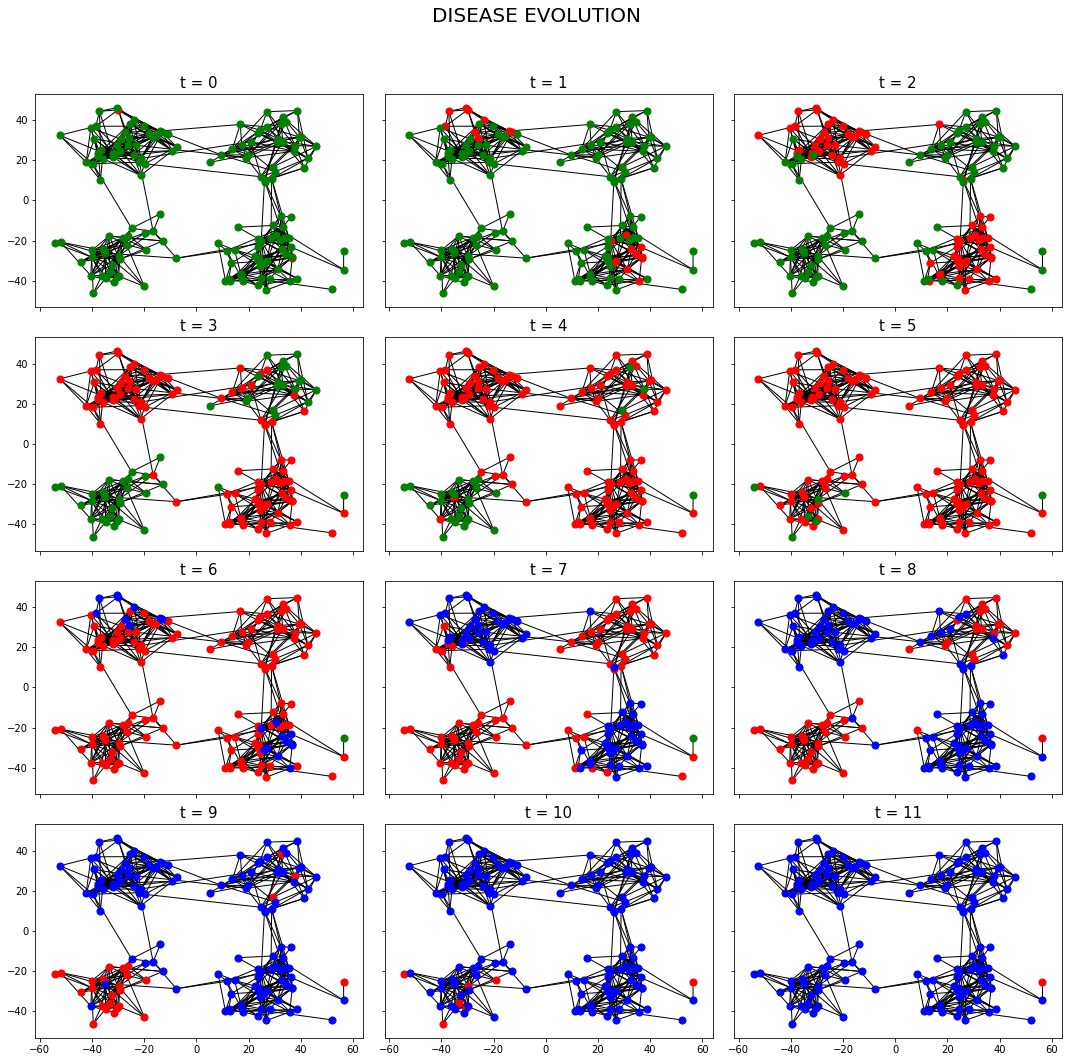

In [35]:
people = 150
time = 12
timeOfSickness = 5
probaContagion = 0.9
firstSicksN
nPlotsPerLine = 3
alertRatio = 0.5
plot = 1
G, pos, alertTimes = DiseaseExperience(people, time, timeOfSickness, probaContagion, firstSicksN, alertRatio, plot, nPlotsPerLine,
                                       graphGenerator = generateClusteredPopulationGraph)

## Varias simulações

#### Sem clusters

[3, 2, 2, 3, 2, 3, 3, 4, 3, 3, 3, 3, 3, 4, 2, 2, 3, 3, 3, 4, 4, 3, 2, 3, 3, 2, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 2, 3, 2, 4, 4, 5, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 4, 4, 2, 3, 3, 4, 4, 2, 2, 4, 3, 2, 4, 2, 4, 2, 3, 3, 2, 3, 4, 3, 2, 2, 3, 4, 3, 4, 3, 4, 3, 3, 2, 3, 2, 2, 3, 2, 2, 2, 4, 3, 3, 3, 3, 4, 6]
[5, 4, 6, 4, 6, 5, 8, 6, 6, 4, 3, 3, 4, 3, 4, 3, 5, 4, 2, 3, 3, 5, 3, 3, 4, 4, 4, 4, 3, 4, 3, 3, 3, 2, 4, 7, 2, 4, 3, 3, 3, 6, 4, 3, 4, 5, 6, 4, 3, 4, 3, 7, 5, 3, 4, 4, 3, 3, 4, 5, 3, 9, 3, 3, 3, 3, 4, 4, 3, 4, 4, 3, 3, 3, 3, 4, 5, 4, 2, 5, 6, 3, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 6, 3, 3, 4, 4, 4, 3, 4, 5, 5, 5, 3, 3, 2, 3, 3, 4, 4, 3, 4, 2, 4, 3, 3, 5, 3, 8, 3, 3, 3, 6, 3, 6, 3, 5, 3, 4, 3, 3, 3, 3, 3, 3, 5, 4, 6, 3, 4, 4, 3, 4, 3, 4, 3, 2, 3, 3, 4, 7, 3, 5, 3, 2, 6, 4, 4, 4, 4, 3, 4, 5, 3, 6, 3, 4, 2, 4, 3, 4, 4, 7, 3, 2, 4, 4, 3, 4, 2, 3, 3, 3, 4, 3, 3, 3, 5, 2, 3, 4, 4, 4, 3, 2, 6, 4, 3, 3, 3, 2, 2, 4, 3, 3, 3, 4, 8, 3, 5, 4, 3, 2, 3, 2, 5, 3, 2, 2, 4, 3, 2, 3, 4, 5, 3, 6, 5, 4, 3, 3,

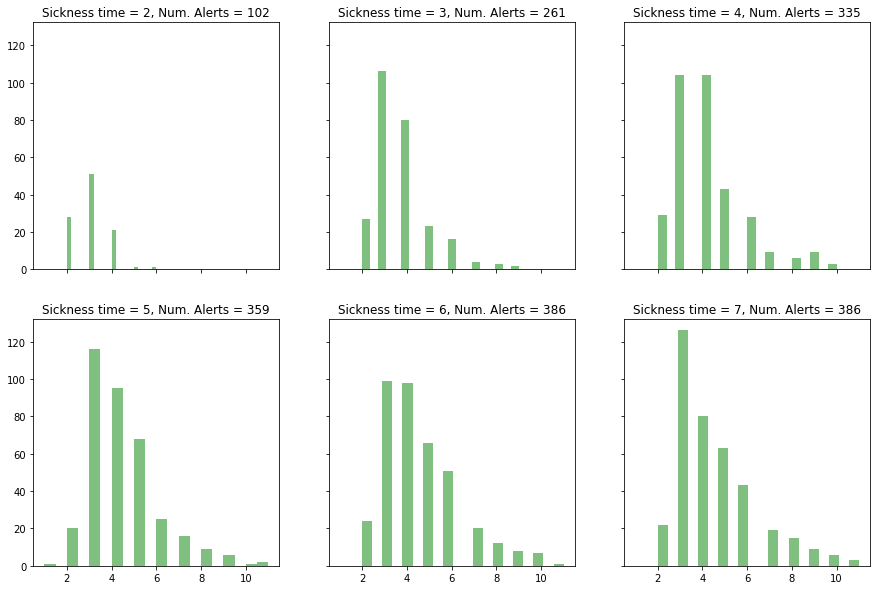

In [36]:
# Para plotar varios histogramas
nLines, nPlotsPerLine = 2, 3
fig, axes = plt.subplots(nLines, nPlotsPerLine, sharex=True, sharey=True, figsize = (15, 10))

# Valores fixos
numSimulations = 40
people = 150
time = 12
alertRatio = 0.5
plot = 0 # nao mostra as etapas intermediarias de contagio, somente queremos o grafo inicial

# Para cada probabilidade de contagio, rodamos 100 simulaçoes (distribuiçoes da populaçao diferentes)
def DiseaseSimulations(timeOfSickness):
    tAlertas = []
    probaContagion = 0.1
    for i in range (11): # probaContagion indo de 0.1 a 1
        for i in range (numSimulations): # Fazemos numSimulations simulacoes e a cada vez a populaçao tem distribuiçao diferente
            # Seleçao aleatoria das primeiras pessoas doentes
            qtitySick = rExponencial(1,0.5)[0] # Quantas pessoas estao doentes
            qtitySick = math.ceil(qtitySick)
            # Simulaçao de propagaçao de doença
            G, pos, alertTimes = DiseaseExperience(people, time, timeOfSickness, probaContagion, qtitySick, alertRatio, 0, nPlotsPerLine)
            if (alertTimes != []): # As vezes nao tem alerta porque a simulaçao tem poucos contagios
                tAlertas.append(alertTimes[0][0])
        probaContagion += 0.1
    return G, pos, tAlertas

# Fazemos variar o timeOfSickness de 2 a 7
line_plot = 0
for experience in range(0,6):
    timeOfSickness = experience + 2 # pelo menos 2 dias sick
    G, pos, tAlertas = DiseaseSimulations(timeOfSickness)
    print(tAlertas)
    title = 'Sickness time = ' + str(timeOfSickness) +", Num. Alerts = " + str(len(tAlertas))
    axes[line_plot, experience%3].set_title(title)
    axes[line_plot, experience%3].hist(tAlertas, 20, facecolor='green', alpha=0.5)
    if (experience%3 == 2):
        line_plot += 1

plt.show()


#### Com clusters

[2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 4, 3, 2, 3, 3, 3, 6, 3, 2, 2, 2, 2, 3, 6, 2, 2, 3, 6, 7, 2, 5, 2, 3, 2, 2, 2, 2, 2, 3, 1, 2, 3, 5, 2, 2, 1, 6, 3, 2, 2, 2, 2, 3, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 3, 2, 2, 3, 2, 5, 2, 2, 2, 5, 5, 4, 2, 2, 5, 5, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 5, 2, 3, 4, 5, 5, 3, 3, 2, 2, 2, 2, 2, 2, 5, 4, 2, 2, 2, 2, 2, 3, 3, 2, 3, 5, 3, 2, 2, 2]
[4, 3, 5, 3, 5, 8, 7, 6, 2, 3, 3, 5, 8, 3, 3, 8, 4, 3, 3, 5, 3, 6, 2, 7, 2, 3, 4, 3, 4, 2, 6, 8, 2, 3, 2, 4, 3, 2, 2, 4, 4, 10, 2, 2, 4, 4, 7, 8, 6, 5, 6, 5, 5, 3, 4, 4, 3, 3, 3, 8, 4, 3, 3, 3, 3, 9, 3, 4, 2, 2, 3, 5, 2, 4, 6, 4, 3, 4, 4, 7, 3, 4, 4, 3, 7, 3, 3, 3, 3, 4, 4, 6, 4, 3, 2, 6, 4, 2, 3, 2, 2, 6, 3, 8, 6, 5, 3, 7, 3, 3, 3, 8, 4, 2, 2, 3, 4, 2, 5, 3, 6, 2, 2, 3, 2, 3, 5, 2, 2, 3, 6, 2, 2, 4, 3, 5, 4, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 6, 2, 6, 4, 2, 2, 3, 3, 2, 6, 4, 5, 3, 2, 4, 2, 4, 4, 3, 5, 3, 2, 6, 4, 3, 3, 2, 6, 3, 6, 2, 3, 3, 4, 2, 7, 2, 4, 2, 2, 4, 5, 2, 3, 6

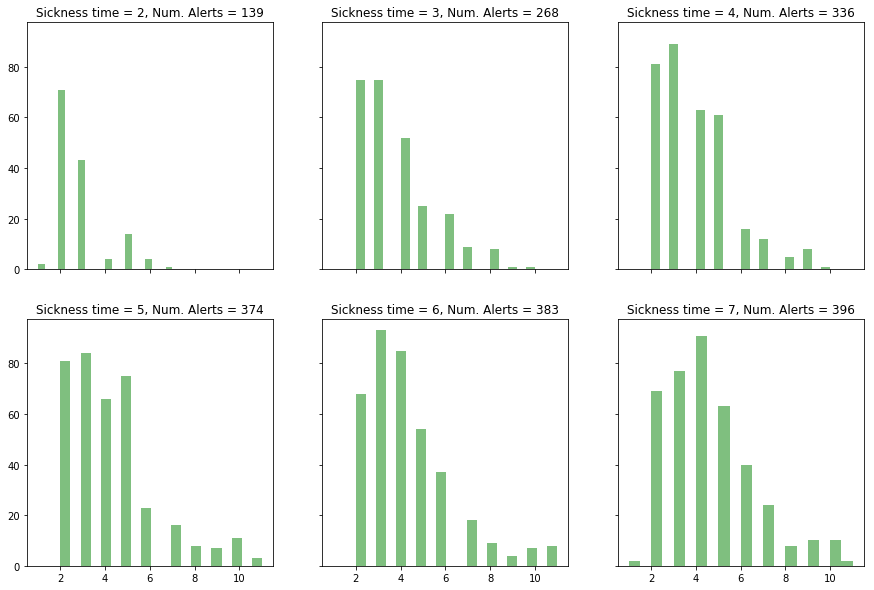

In [37]:
# Para plotar varios histogramas
nLines, nPlotsPerLine = 2, 3
fig, axes = plt.subplots(nLines, nPlotsPerLine, sharex=True, sharey=True, figsize = (15, 10))

# Valores fixos
numSimulations = 40
people = 150
time = 12
alertRatio = 0.5
plot = 0 # nao mostra as etapas intermediarias de contagio, somente queremos o grafo inicial

# Para cada probabilidade de contagio, rodamos 100 simulaçoes (distribuiçoes da populaçao diferentes)
def DiseaseSimulations(timeOfSickness):
    tAlertas = []
    probaContagion = 0.1
    for i in range (11): # probaContagion indo de 0.1 a 1
        for i in range (numSimulations): # Fazemos numSimulations simulacoes e a cada vez a populaçao tem distribuiçao diferente
            # Seleçao aleatoria das primeiras pessoas doentes
            qtitySick = rExponencial(1,0.5)[0] # Quantas pessoas estao doentes
            qtitySick = math.ceil(qtitySick)
            # Simulaçao de propagaçao de doença
            G, pos, alertTimes = DiseaseExperience(people, time, timeOfSickness, probaContagion, qtitySick, alertRatio, 0, nPlotsPerLine, graphGenerator = generateClusteredPopulationGraph)
            if (alertTimes != []): # As vezes nao tem alerta porque a simulaçao tem poucos contagios
                tAlertas.append(alertTimes[0][0])
        probaContagion += 0.1
    return G, pos, tAlertas

# Fazemos variar o timeOfSickness de 2 a 7
line_plot = 0
for experience in range(0,6):
    timeOfSickness = experience + 2 # pelo menos 2 dias sick
    G, pos, tAlertas = DiseaseSimulations(timeOfSickness)
    print(tAlertas)
    title = 'Sickness time = ' + str(timeOfSickness) +", Num. Alerts = " + str(len(tAlertas))
    axes[line_plot, experience%3].set_title(title)
    axes[line_plot, experience%3].hist(tAlertas, 20, facecolor='green', alpha=0.5)
    if (experience%3 == 2):
        line_plot += 1

plt.show()


#### Melhoras possiveis

* Fazer que os grafo tenha exatamente o numero de pessoas botado como entrada
* Aplicar modelos mais complexos de propagaçao de doença
* Implementar que a pessoa possa estar doente duas vezes
* Simular com um tempo mais grande
* Simular com os clusters também e chegar a resultados

#### Bibliografia

Teoria
http://www.est.ufmg.br/portal/arquivos/rts/RTE_01_2017.pdf
https://www.teses.usp.br/teses/disponiveis/100/100132/tde-04052015-091411/publico/fmoshecorrigida.pdf
https://www.ppgee.ufmg.br/defesas/350M.PDF 

Random Graph Simulation
https://graph-tool.skewed.de/static/doc/generation.html

Epidemia
https://pyepydemic.readthedocs.io/en/latest/